# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_json('ultimate_data_challenge.json')

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


# Exploratory Data Analysis

### How many cities are in our dataset and how many users per city?

In [6]:
cities= list(df.city.unique())
print('The cities in our dataset are {}'.format(cities))

The cities in our dataset are ["King's Landing", 'Astapor', 'Winterfell']


Text(0, 0.5, 'Number of Drivers')

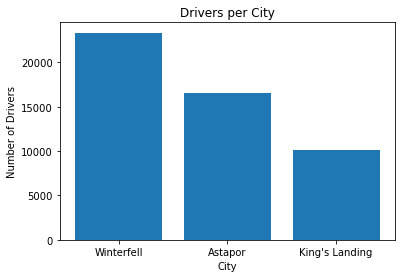

In [7]:
# Make df of drivers per city
city_counts= pd.DataFrame(df.city.value_counts()).reset_index()
city_counts.rename(columns= {'index': "City", "city": "Num Drivers"}, inplace= True)
# Plot bar chart of drivers per city
plt.bar(x= city_counts.City, height= city_counts['Num Drivers'])
plt.title('Drivers per City')
plt.xlabel('City')
plt.ylabel('Number of Drivers')

### Distribution of Trips in First 30 days

Text(0.5, 1.0, 'Distribution of Trips in First 30 Days')

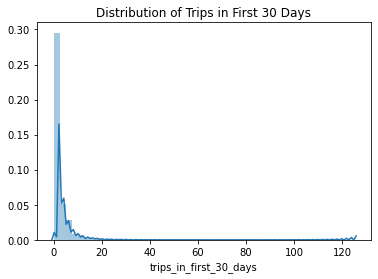

In [8]:
sns.distplot(df.trips_in_first_30_days)
plt.title('Distribution of Trips in First 30 Days')

### Earliest and Latest Signup Date

In [9]:
earliest= df.signup_date.min()
latest= df.signup_date.max()
print('Our earliest signup date is {} and our most recent sign up date is {}'.format(earliest, latest))

Our earliest signup date is 2014-01-01 and our most recent sign up date is 2014-01-31


### Distribution of Driver Ratings

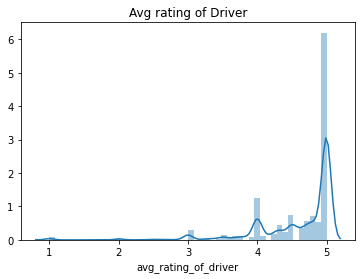

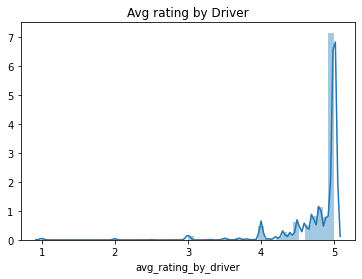

In [10]:
sns.distplot(df.avg_rating_of_driver)
plt.title('Avg rating of Driver')
plt.show()
sns.distplot(df.avg_rating_by_driver)
plt.title('Avg rating by Driver')
plt.show()

### How many Ultimate Black Users do we have? 

In [11]:
ultimate_blacks= df.ultimate_black_user.value_counts()[1]
print('{} % of our drivers are Ultimate Black Members.'.format(round(ultimate_blacks/len(df) * 100, 2)))

37.71 % of our drivers are Ultimate Black Members.


### What is our distrubution look like for Avg Distance? 

Text(0.5, 1.0, 'Distribution of Average Trip Distance')

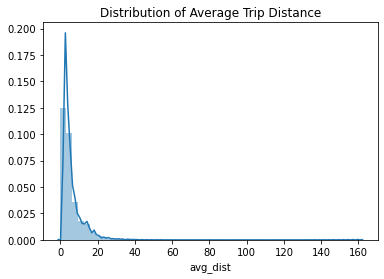

In [12]:
sns.distplot(df.avg_dist)
plt.title('Distribution of Average Trip Distance')

# Preparing Data For Modeling

## Dealing with Null Values

In [13]:
# Check where we have null values
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

We have signifant null values in both the driver rating columns.

For each of those columns we will replace null values the median for that column. 

In [14]:
df.avg_rating_of_driver.fillna(value= df.avg_rating_of_driver.median(), inplace=True)

In [15]:
df.avg_rating_by_driver.fillna(value=df.avg_rating_by_driver.median(),  inplace= True)

Phone number also has a number of missing values.

For those we will just fill with the previous phone type

In [16]:
df.phone.fillna(method='bfill', inplace= True)

In [17]:
# Recheck the null values
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

## Creating an 'Active' column

Column will be binary

0: user was active in the last 30 days

1: user was not active in the last 30 days

In [18]:
most_recent= df.last_trip_date.max()
print('The most recent trip in the dataset occured on {}'.format(most_recent))

The most recent trip in the dataset occured on 2014-07-01


Therefore is a driver's last_trip_date is after or on 2014-06-01 they will be labeled inactive. A 'Active' value of 1

If a driver's last_trip_date is before 2014-06-01 they will be labeled active. A 'Active' value of 0

In [19]:
# If customer is Active give them True values. If Not Active give them False value
df['Active']= df['last_trip_date'] >= '2014-06-01'  

In [20]:
# If a driver is Active (True) assign them a 0, if a driver is Not Active (False) assign them a 1
binary= []
for driver in df.Active:
    if driver is True:
        binary.append(0)
    elif driver is False:
        binary.append(1)

df['Active']= binary
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


In [21]:
df.Active.value_counts()

1    31196
0    18804
Name: Active, dtype: int64

In [22]:
active_count= len(df[df.Active == 0])
inactive_count= len(df[df.Active == 1])
print('Percent of Drivers Retained: {}%'.format(round(active_count/len(df) * 100,2)))
print('Precent of Drivers Not Retained: {}%'.format(round(inactive_count/len(df) * 100, 2)))

Percent of Drivers Retained: 37.61%
Precent of Drivers Not Retained: 62.39%


# Building a Model to Predict Retention

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Logsitic Regression and Support Vector Machine

In [24]:
# We need to deal with non-numeric data
# What our our data types? 
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
Active                      int64
dtype: object

#### Plan for Categorical Variables

city: Get Dummies

signup_date: We won't use this column because all signups are coming from the same months

last_trip_date: We won't use this column because it leak info regarding our target variabes of 

phone: We won't use this column because it shouldn't give us much info and there is no reasonable way to convert it to an informative numeric variables

ultimate_black_user: Get dummies


In [25]:
# Make a copy of the dataframe 
df_numeric= df.copy()
# Drop columns we discussed above
df_numeric.drop(columns=['signup_date', 'last_trip_date', 'phone'], inplace=True)

# get dummies for city and ultimate_black
df_numeric= pd.get_dummies(data=df_numeric, columns= ['city', 'ultimate_black_user'])
df_numeric.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Active,city_Astapor,city_King's Landing,city_Winterfell,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,0,1,0,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,1,0,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,1,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,0,1,0,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,1,0,0,1,1,0


In [26]:
# Recheck Data Types
df_numeric.dtypes

trips_in_first_30_days         int64
avg_rating_of_driver         float64
avg_surge                    float64
surge_pct                    float64
weekday_pct                  float64
avg_dist                     float64
avg_rating_by_driver         float64
Active                         int64
city_Astapor                   uint8
city_King's Landing            uint8
city_Winterfell                uint8
ultimate_black_user_False      uint8
ultimate_black_user_True       uint8
dtype: object

#### Logstic Regression Model

In [27]:
from sklearn.preprocessing import StandardScaler
# Create input variables
X= df_numeric.drop(columns='Active')
# Set target variable to be retention column
y= df_numeric.Active

# Split into training and test while maintaining class frequencies
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, stratify= y)

# Scale X
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

# Make sure vectors are of proper shape
print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)
print('/n')

print('Our input variables are {}'.format(X.columns))


(35000, 12)
(35000,)
(15000, 12)
(15000,)
/n
Our input variables are Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'ultimate_black_user_False', 'ultimate_black_user_True'],
      dtype='object')


### Logistic Regression

In [28]:
model_name= 'Logistic Regression'
model= LogisticRegression()
# fit the model
result= model.fit(x_train_scaled, y_train)
# make predictions
y_pred= model.predict(x_test_scaled)

# computer average score
avg_score= round(accuracy_score(y_test, y_pred),2)
print('{} Accuracy Score: {}'.format(model_name,avg_score))
print('\n')

# compute classification report
report= classification_report(y_test, y_pred)
print('Classification Report for {} Model'.format(model_name))
print(report)

Logistic Regression Accuracy Score: 0.7


Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.66      0.43      0.52      5641
           1       0.72      0.87      0.79      9359

    accuracy                           0.70     15000
   macro avg       0.69      0.65      0.65     15000
weighted avg       0.70      0.70      0.69     15000



### SVM Models

In [29]:
from sklearn import svm
svm_models= [svm.SVC(), svm.NuSVC(), svm.LinearSVC()]

for model in svm_models:
    model_name= str(model)[:-2]
    model= model
    # fit the model
    result= model.fit(x_train_scaled, y_train)
    # make predictions
    y_pred= model.predict(x_test_scaled)

    # computer average score
    avg_score= round(accuracy_score(y_test, y_pred),2)
    print('{} Accuracy Score: {}'.format(model_name,avg_score))
    print('\n')

    # compute classification report
    report= classification_report(y_test, y_pred)
    print('Classification Report for {} Model'.format(model_name))
    print(report)
    

SVC Accuracy Score: 0.76


Classification Report for SVC Model
              precision    recall  f1-score   support

           0       0.73      0.57      0.64      5641
           1       0.77      0.87      0.82      9359

    accuracy                           0.76     15000
   macro avg       0.75      0.72      0.73     15000
weighted avg       0.75      0.76      0.75     15000

NuSVC Accuracy Score: 0.76


Classification Report for NuSVC Model
              precision    recall  f1-score   support

           0       0.72      0.58      0.64      5641
           1       0.77      0.86      0.81      9359

    accuracy                           0.76     15000
   macro avg       0.74      0.72      0.73     15000
weighted avg       0.75      0.76      0.75     15000

LinearSVC Accuracy Score: 0.7


Classification Report for LinearSVC Model
              precision    recall  f1-score   support

           0       0.67      0.42      0.52      5641
           1       0.71      0.87

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Tree Models

In [30]:
tree_models= [RandomForestClassifier(), GradientBoostingClassifier()]

for model in tree_models:
    model_name= str(model)[:-2]
    model= model
    # fit the model
    result= model.fit(x_train, y_train)
    # make predictions
    y_pred= model.predict(x_test)

    # computer average score
    avg_score= round(accuracy_score(y_test, y_pred),2)
    print('{} Accuracy Score: {}'.format(model_name,avg_score))
    print('\n')

    # compute classification report
    report= classification_report(y_test, y_pred)
    print('Classification Report for {} Model'.format(model_name))
    print(report)

RandomForestClassifier Accuracy Score: 0.74


Classification Report for RandomForestClassifier Model
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      5641
           1       0.79      0.80      0.80      9359

    accuracy                           0.74     15000
   macro avg       0.73      0.72      0.73     15000
weighted avg       0.74      0.74      0.74     15000

GradientBoostingClassifier Accuracy Score: 0.78


Classification Report for GradientBoostingClassifier Model
              precision    recall  f1-score   support

           0       0.74      0.62      0.68      5641
           1       0.79      0.87      0.83      9359

    accuracy                           0.78     15000
   macro avg       0.77      0.75      0.75     15000
weighted avg       0.77      0.78      0.77     15000



## Oversampling the Minority Class

Performance is rather poor on the Retainted Class (Active = 0). As we saw above this class occurs at about half the frequency that the Non Retained class (Active = 1) does. 

We will try to oversample the Active = 0 class in order to improve performance on that class.



In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
sm= SMOTE(random_state=12)
# Create a smote version of training data
x_train_smote, y_train_smote= sm.fit_sample(x_train, y_train)

# Create a smote version of the scaled training data. 
#Y_train was note scaled but for clarity we will create a new y_train variable to use with the scaled data
x_train_scaled_smote, y_train_scaled_smote= sm.fit_sample(x_train_scaled, y_train)

print('Ratios for SMOTE Data.')
print (np.unique(y_train, return_counts=True) , np.bincount(y_train_smote))
print('\n')

print('Ratios for Scaled SMOTE Data.')
print (np.unique(y_train, return_counts=True) , np.bincount(y_train_smote))
print('\n')

Ratios for SMOTE Data.
(array([0, 1]), array([13163, 21837])) [21837 21837]


Ratios for Scaled SMOTE Data.
(array([0, 1]), array([13163, 21837])) [21837 21837]




#### Logistic Regression with SMOTE

In [33]:
model_name= 'Logistic Regression SMOTED'
model= LogisticRegression()
# fit the model
result= model.fit(x_train_scaled_smote, y_train_scaled_smote)
# make predictions
y_pred= model.predict(x_test_scaled)

# computer average score
avg_score= round(accuracy_score(y_test, y_pred),2)
print('{} Accuracy Score: {}'.format(model_name,avg_score))
print('\n')

# compute classification report
report= classification_report(y_test, y_pred)
print('Classification Report for {} Model'.format(model_name))
print(report)

Logistic Regression SMOTED Accuracy Score: 0.68


Classification Report for Logistic Regression SMOTED Model
              precision    recall  f1-score   support

           0       0.57      0.64      0.60      5641
           1       0.77      0.71      0.74      9359

    accuracy                           0.68     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.69      0.68      0.69     15000



SMOTE did not help our Logistic Regression Model

#### Support Vector Classifier with SMOTE

In [34]:
model_name= 'Support Vector Classifier SMOTED'
model= svm.SVC()
# fit the model
result= model.fit(x_train_scaled_smote, y_train_scaled_smote)
# make predictions
y_pred= model.predict(x_test_scaled)

# computer average score
avg_score= round(accuracy_score(y_test, y_pred),2)
print('{} Accuracy Score: {}'.format(model_name,avg_score))
print('\n')

# compute classification report
report= classification_report(y_test, y_pred)
print('Classification Report for {} Model'.format(model_name))
print(report)

Support Vector Classifier SMOTED Accuracy Score: 0.74


Classification Report for Support Vector Classifier SMOTED Model
              precision    recall  f1-score   support

           0       0.63      0.75      0.69      5641
           1       0.83      0.74      0.78      9359

    accuracy                           0.74     15000
   macro avg       0.73      0.74      0.73     15000
weighted avg       0.76      0.74      0.75     15000



#### Tree Models with SMOTE

In [35]:
tree_models= [RandomForestClassifier(), GradientBoostingClassifier()]

for model in tree_models:
    model_name= (str(model)[:-2] + "With SMOTE")
    model= model
    # fit the model
    result= model.fit(x_train_smote, y_train_smote)
    # make predictions
    y_pred= model.predict(x_test)

    # computer average score
    avg_score= round(accuracy_score(y_test, y_pred),2)
    print('{} Accuracy Score: {}'.format(model_name,avg_score))
    print('\n')

    # compute classification report
    report= classification_report(y_test, y_pred)
    print('Classification Report for {} Model'.format(model_name))
    print(report)

RandomForestClassifierWith SMOTE Accuracy Score: 0.74


Classification Report for RandomForestClassifierWith SMOTE Model
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      5641
           1       0.80      0.78      0.79      9359

    accuracy                           0.74     15000
   macro avg       0.72      0.73      0.72     15000
weighted avg       0.74      0.74      0.74     15000

GradientBoostingClassifierWith SMOTE Accuracy Score: 0.77


Classification Report for GradientBoostingClassifierWith SMOTE Model
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      5641
           1       0.82      0.81      0.81      9359

    accuracy                           0.77     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.77      0.77      0.77     15000



SMOTE did significantly improve the overall accuracy of our tree models but it did give us some performance improvements on the Retained Class (Active= 0)

## Hyper Parameter Tuning

For this section we will focus on just two models. One Linear and One Tree Model

Linear Model used will be Support Vector Classifier as that gave us the best performance above. 

Tree Model used will be Gradient Boosting Classifier as that gave us the best performance above. 

#### Support Vector Classifier Hyperparemeter Tuning

# STOP: Don't Rerun Gridsearch. Too much for computer to handle.

In [47]:
model= svm.SVC()

param_grid= {"C": [0.1, 1, 10, 100], 'gamma': ['auto', 'scale']}

grid = GridSearchCV(model, param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(x_train_scaled, y_train)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 27.9min finished


{'C': 100, 'gamma': 'scale'}
SVC(C=100)


In [48]:
model_name= 'Tuned Support Vector Classfier'
model= svm.SVC(C=100, gamma='scale')

# fit the model
result= model.fit(x_train_scaled, y_train)
# make predictions
y_pred= model.predict(x_test_scaled)

# computer average score
avg_score= round(accuracy_score(y_test, y_pred),2)
print('{} Accuracy Score: {}'.format(model_name,avg_score))
print('\n')

# compute classification report
report= classification_report(y_test, y_pred)
print('Classification Report for {} Model'.format(model_name))
print(report)

Tuned Support Vector Classfier Accuracy Score: 0.76


Classification Report for Tuned Support Vector Classfier Model
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      5641
           1       0.78      0.85      0.82      9359

    accuracy                           0.76     15000
   macro avg       0.75      0.73      0.74     15000
weighted avg       0.76      0.76      0.76     15000



# STOP: Don't Rerun Gridsearch. Too much for computer

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
model= GradientBoostingClassifier()

param_grid= {'loss': ['deviance', 'exponential'], 'n_estimators': [50,100,300], 'max_depth': [3, 5, 8]}

grid = GridSearchCV(model, param_grid, refit = True, verbose = 2) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] loss=deviance, max_depth=3, n_estimators=50 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... loss=deviance, max_depth=3, n_estimators=50, total=   1.1s
[CV] loss=deviance, max_depth=3, n_estimators=50 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ...... loss=deviance, max_depth=3, n_estimators=50, total=   1.1s
[CV] loss=deviance, max_depth=3, n_estimators=50 .....................
[CV] ...... loss=deviance, max_depth=3, n_estimators=50, total=   1.0s
[CV] loss=deviance, max_depth=3, n_estimators=50 .....................
[CV] ...... loss=deviance, max_depth=3, n_estimators=50, total=   1.1s
[CV] loss=deviance, max_depth=3, n_estimators=50 .....................
[CV] ...... loss=deviance, max_depth=3, n_estimators=50, total=   1.0s
[CV] loss=deviance, max_depth=3, n_estimators=100 ....................
[CV] ..... loss=deviance, max_depth=3, n_estimators=100, total=   2.1s
[CV] loss=deviance, max_depth=3, n_estimators=100 ....................
[CV] ..... loss=deviance, max_depth=3, n_estimators=100, total=   2.1s
[CV] loss=deviance, max_depth=3, n_estimators=100 ....................
[CV] ..... loss=deviance, max_depth=3, n_estimators=100, total=   2.2s
[CV] loss=deviance, max_depth=3, n_estimators=100 ....................
[CV] .

[CV] .. loss=exponential, max_depth=3, n_estimators=300, total=   6.0s
[CV] loss=exponential, max_depth=5, n_estimators=50 ..................
[CV] ... loss=exponential, max_depth=5, n_estimators=50, total=   1.6s
[CV] loss=exponential, max_depth=5, n_estimators=50 ..................
[CV] ... loss=exponential, max_depth=5, n_estimators=50, total=   1.6s
[CV] loss=exponential, max_depth=5, n_estimators=50 ..................
[CV] ... loss=exponential, max_depth=5, n_estimators=50, total=   1.6s
[CV] loss=exponential, max_depth=5, n_estimators=50 ..................
[CV] ... loss=exponential, max_depth=5, n_estimators=50, total=   1.6s
[CV] loss=exponential, max_depth=5, n_estimators=50 ..................
[CV] ... loss=exponential, max_depth=5, n_estimators=50, total=   1.6s
[CV] loss=exponential, max_depth=5, n_estimators=100 .................
[CV] .. loss=exponential, max_depth=5, n_estimators=100, total=   3.2s
[CV] loss=exponential, max_depth=5, n_estimators=100 .................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  8.5min finished


{'loss': 'exponential', 'max_depth': 5, 'n_estimators': 300}
GradientBoostingClassifier(loss='exponential', max_depth=5, n_estimators=300)


# Final Model

In [44]:
model_name= 'Tuned Gradient Boosting Classfier'
model= GradientBoostingClassifier(loss='exponential', max_depth=5, n_estimators=300)

# fit the model
result= model.fit(x_train, y_train)
# make predictions
y_pred= model.predict(x_test)

# computer average score
avg_score= round(accuracy_score(y_test, y_pred),2)
print('{} Accuracy Score: {}'.format(model_name,avg_score))
print('\n')

# compute classification report
report= classification_report(y_test, y_pred)
print('Classification Report for {} Model'.format(model_name))
print(report)


Tuned Gradient Boosting Classfier Accuracy Score: 0.78


Classification Report for Tuned Gradient Boosting Classfier Model
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      5641
           1       0.80      0.85      0.83      9359

    accuracy                           0.78     15000
   macro avg       0.76      0.75      0.76     15000
weighted avg       0.77      0.78      0.77     15000



## Modeling Summary

In the end the best model proved to be a Gradient Boosting Classifier. 

With the GBC we were able to get testing accuracy up to 0.78 meaning that the model can accurately classify 78% of new cases. In other words the model can predict with 78% accuracy wether or not a driver will still be driving for the company in 6 months. 

The model performs with higher accuracy (F1 Score) on the non-retained class (Actvie = 1) than it does on the retained class (Active = 0). The difference is 83% vs 69%

## Understanding the Factors Contributing to Churn

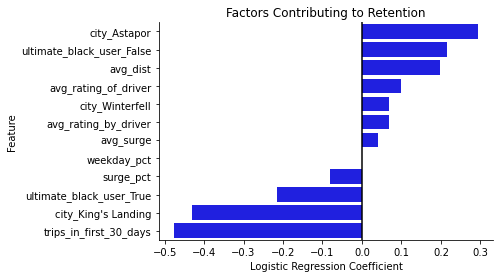

In [49]:
model= LogisticRegression()
# fit the model
result= model.fit(x_train_scaled, y_train)

# Visualizing Feature Importance from the Logistic Regression
# create empty df
logit_df= pd.DataFrame()

coefficients= result.coef_.tolist()[0]
features= list(x_train.columns)


# Add features and their importance to the dataframe
logit_df['Feature']= features
logit_df['Coefficient']= coefficients

# Sort the dataframe by coefficient value
logit_df= logit_df.sort_values(by='Coefficient', ascending=False )

# plot the dataframe 
sns.barplot(x='Coefficient', y= 'Feature', data=logit_df, color='b')
plt.title('Factors Contributing to Retention')
plt.xlabel('Logistic Regression Coefficient')
plt.axvline(x=0, color='black')
sns.despine()


### Interpretation

While logistic regress was not the best classifer it does have the best intreptability so we will use it to identify factors contributing to drvier Churn. 

Factors making a driver more likely to Churn: Living in Astapor, Not being and ultimate black user, and having a high average trip distance. 

Factors making a driver less likely to Churn: A larger number of trips completed in their first 30 days, living in King's landing and being an Ultimate Black User